In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
from PIL import Image

In [9]:
'''
This analyzes the colors of a single painting from Andy Warhol's Shot Marilyn series. 

'''
# Load the images
light_blue = Image.open('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/light_blue.jpeg')
sage_blue = Image.open('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/sage_blue.jpeg')
red = Image.open('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/red.jpeg')
orange = Image.open('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/orange.jpeg')
turquoise = Image.open('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/turquoise.jpeg')

In [57]:
#reshape array
light_blue_array = np.array(light_blue)
sage_array = np.array(sage_blue)
red_array = np.array(red)
orange_array = np.array(orange)
turquoise_array = np.array(turquoise)

In [63]:
#convert arrays to 1 dimension
def make_1d_arrays(arrays):
    """Reshape each array in the input list to a 1-dimensional array"""
    result = []
    for array in arrays:
        result.append(array.reshape(array.shape[0] * array.shape[1], array.shape[2]))
    return result

arrays = [light_blue_array, sage_array, red_array, orange_array, turquoise_array]
result = make_1d_arrays(arrays)
light_blue_1d, sage_1d, red_1d, orange_1d, turquoise_1d = result

In [66]:
#perform K-means clustering
kmeans_light_blue = KMeans(n_clusters=5).fit(light_blue_1d)

def make_kmeans_clusters(arrays, n_clusters):
    """Perform KMeans clustering on each array in the input list with the given number of clusters"""
    result = []
    for array in arrays:
        kmeans = KMeans(n_clusters=n_clusters).fit(array)
        result.append(kmeans)
    return result

n_clusters = 5
arrays = [light_blue_1d, sage_1d, red_1d, orange_1d, turquoise_1d]
result = make_kmeans_clusters(arrays, n_clusters)
kmeans_light_blue, kmeans_sage, kmeans_red, kmeans_orange, kmeans_turquoise = result

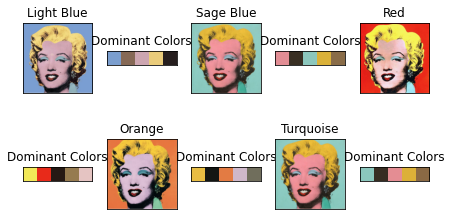

In [80]:
# Get the dominant colors from the clusters
dominant_colors_light_blue = kmeans_light_blue.cluster_centers_
dominant_colors_sage = kmeans_sage.cluster_centers_
dominant_colors_red = kmeans_red.cluster_centers_
dominant_colors_orange = kmeans_orange.cluster_centers_
dominant_colors_turquoise = kmeans_turquoise.cluster_centers_

# Display the dominant colors
plt.subplot(2, 5, 1)
plt.imshow(light_blue)
plt.title('Light Blue')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 5, 2)
plt.imshow(np.uint8([dominant_colors_light_blue]))
plt.title('Dominant Colors')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 5, 3)
plt.imshow(sage_blue)
plt.title('Sage Blue')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 5, 4)
plt.imshow(np.uint8([dominant_colors_sage]))
plt.title('Dominant Colors')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 5, 5)
plt.imshow(red)
plt.title('Red')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 5, 6)
plt.imshow(np.uint8([dominant_colors_red]))
plt.title('Dominant Colors')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 5, 7)
plt.imshow(orange)
plt.title('Orange')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 5, 8)
plt.imshow(np.uint8([dominant_colors_orange]))
plt.title('Dominant Colors')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 5, 9)
plt.imshow(turquoise)
plt.title('Turquoise')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 5, 10)
plt.imshow(np.uint8([dominant_colors_turquoise]))
plt.title('Dominant Colors')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

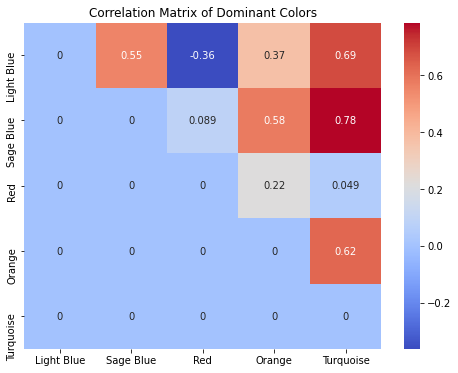

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 5x5 matrix of zeros to hold the correlations
corr_matrix = np.zeros((5,5))

# Fill in the matrix with the correlations
corr_matrix[0,1] = np.corrcoef(dominant_colors_light_blue.flatten(), dominant_colors_sage.flatten())[0,1]
corr_matrix[0,2] = np.corrcoef(dominant_colors_light_blue.flatten(), dominant_colors_red.flatten())[0,1]
corr_matrix[0,3] = np.corrcoef(dominant_colors_light_blue.flatten(), dominant_colors_orange.flatten())[0,1]
corr_matrix[0,4] = np.corrcoef(dominant_colors_light_blue.flatten(), dominant_colors_turquoise.flatten())[0,1]
corr_matrix[1,2] = np.corrcoef(dominant_colors_sage.flatten(), dominant_colors_red.flatten())[0,1]
corr_matrix[1,3] = np.corrcoef(dominant_colors_sage.flatten(), dominant_colors_orange.flatten())[0,1]
corr_matrix[1,4] = np.corrcoef(dominant_colors_sage.flatten(), dominant_colors_turquoise.flatten())[0,1]
corr_matrix[2,3] = np.corrcoef(dominant_colors_red.flatten(), dominant_colors_orange.flatten())[0,1]
corr_matrix[2,4] = np.corrcoef(dominant_colors_red.flatten(), dominant_colors_turquoise.flatten())[0,1]
corr_matrix[3,4] = np.corrcoef(dominant_colors_orange.flatten(), dominant_colors_turquoise.flatten())[0,1]

# Convert the matrix to a pandas DataFrame for easier manipulation
corr_df = pd.DataFrame(corr_matrix, columns=['Light Blue', 'Sage Blue', 'Red', 'Orange', 'Turquoise'], 
                       index=['Light Blue', 'Sage Blue', 'Red', 'Orange', 'Turquoise'])

# Create a heatmap of the correlation matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Dominant Colors')
plt.show()
